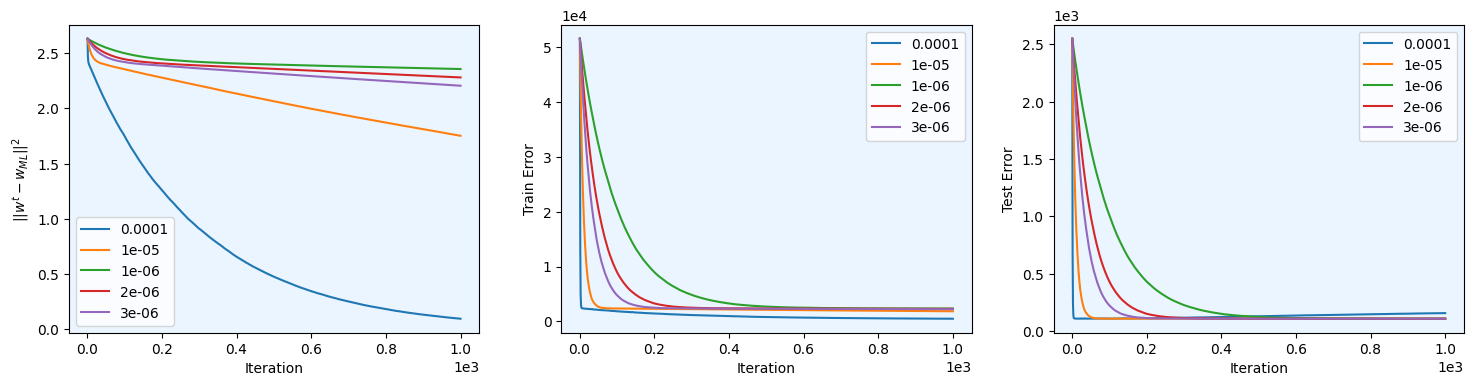

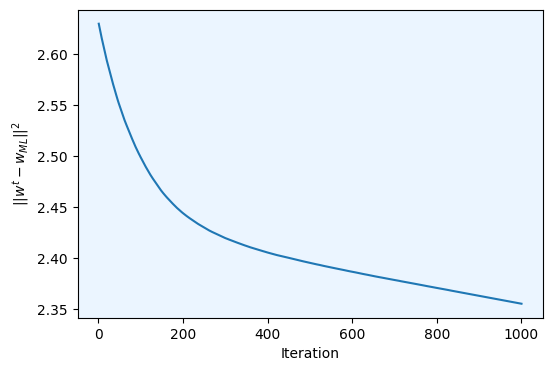

In [2]:
import numpy as np
import matplotlib.pyplot as plt

train_data = np.genfromtxt('A2Q2Data_train.csv', delimiter=',')
train_X = train_data[:, :100].T
train_Y = train_data[:, -1]
test_data = np.genfromtxt('A2Q2Data_test.csv', delimiter=',')
test_X = test_data[:, :100].T
test_Y = test_data[:, -1]
num_iterations = 1000
batch_size = 100
dimensions, num_points = train_X.shape 
num_batches = num_points//batch_size

w_ML = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X, train_X.T)), train_X), train_Y)

def calculate_error(w, X, Y):
    return np.linalg.norm((np.matmul(X.T, w) - Y))**2

def gradient(w, X, Y):
    return np.array(2*np.matmul(X, (np.matmul(X.T, w) - Y)))

steps = np.array([1e-4, 1e-5, 1e-6, 2*1e-6, 3*1e-6])
num_steps = steps.shape[0]
step_w_sep = np.zeros((num_steps, num_iterations))
step_train_error = np.zeros((num_steps, num_iterations))
step_test_error = np.zeros((num_steps, num_iterations))
step_stoc_w = np.zeros((num_steps, num_iterations, dimensions))
for i, step in enumerate(steps):
    w = np.zeros(dimensions)
    for iteration in range(num_iterations):
        step_w_sep[i, iteration] = np.linalg.norm(w - w_ML)**2
        step_train_error[i, iteration] = calculate_error(w, train_X, train_Y)
        step_test_error[i, iteration] = calculate_error(w, test_X, test_Y)
        ran_sample = np.random.randint(0, num_points, batch_size)
        stoc_x = train_X[:, ran_sample]
        stoc_y = train_Y[ran_sample]
        w = w - step*gradient(w, stoc_x, stoc_y)

y_labels = [r'$||w^t - w_{ML}||^2$', 'Train Error', 'Test Error']
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
x = np.linspace(1, num_iterations, num_iterations)
for i, step in enumerate(steps):
    y = np.array([step_w_sep[i], step_train_error[i], step_test_error[i]])
    for j, ax in enumerate(axes):
        ax.plot(x, y[j], label=str(step))
        ax.set_xlabel("Iteration")
        ax.set_ylabel(y_labels[j])
        ax.set_facecolor('#ebf5ff')
        ax.ticklabel_format(scilimits=(-3, 2))
        ax.legend()
plt.savefig('images/Q2/sgd_various_steps')
plt.show()

fig, axes = plt.subplots(1, 1, figsize=(6, 4))
axes.plot(x, step_w_sep[2])
axes.set_xlabel('Iteration')
axes.set_ylabel(r'$||w^t - w_{ML}||^2$')
axes.set_facecolor('#ebf5ff')
plt.savefig('images/Q2/sgd_fixed_step')
plt.show()